##**Introduction**

Porter is India's Largest Marketplace for Intra-City Logistics. Leader in the country's $40 billion intra-city logistics market, Porter strives to improve the lives of 1,50,000+ driver-partners by providing them with consistent earning & independence. Currently, the company has serviced 5+ million customers

Porter works with a wide range of restaurants for delivering their items directly to the people.

Porter has a number of delivery partners available for delivering the food, from various restaurants and wants to get an estimated delivery time that it can provide the customers on the basis of what they are ordering, from where and also the delivery partners.This dataset has the required data to train a regression model that will do the delivery time estimation, based on all those features.

**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from keras.metrics import R2Score

In [ ]:
!gdown --fuzzy "https://drive.google.com/file/d/1hJw0LPpedRDPK64inElzM_o8laY_uWMk/view?usp=sharing"

Downloading...
From: https://drive.google.com/uc?id=1hJw0LPpedRDPK64inElzM_o8laY_uWMk
To: /content/dataset.csv
100% 23.8M/23.8M [00:00<00:00, 85.1MB/s]


In [ ]:
df = pd.read_csv('/content/dataset.csv')

In [ ]:
df.head(5)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


##**Defining problem statement, importing the data and data structure analysis.**

*Problem Statement-* Porter has a number of delivery partners available for delivering the food, from various restaurants and wants to get an estimated delivery time that it can provide the customers on the basis of what they are ordering, from where and also the delivery partners.

<br>This dataset has the required data to train a regression model that will do the delivery time esimation, based on all those features.</br>

In [ ]:
print(f'Number of rows in dataset: {df.shape[0]}')
print(f'Number of columns in dataset: {df.shape[1]}')

Number of rows in dataset: 197428
Number of columns in dataset: 14


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [ ]:
df.describe()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
count,196441.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000
mean,2.978706,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065
std,1.524867,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830
min,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000
25%,2.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000
50%,3.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000
75%,4.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000
max,6.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000


## **Data preprocessing and feature engineering**

- Data cleaning
- Null value handling
- Creating the target column (time taken for delivery) from order timestamp and - delivery timestamp
- Getting hour and day of the week
- Encoding categorical column

In [ ]:
df.isnull().sum()

,0
market_id,987
created_at,0
actual_delivery_time,7
store_id,0
store_primary_category,4760
order_protocol,995
total_items,0
subtotal,0
num_distinct_items,0
min_item_price,0


Let us start with calculating how much null values are present as a percentage of total data in that column.

In [ ]:
null_columns = []
for col in df.columns:
  if df[col].isnull().sum() > 0:
    null_columns.append(col)

null_columns

['market_id',
 'actual_delivery_time',
 'store_primary_category',
 'order_protocol',
 'total_onshift_partners',
 'total_busy_partners',
 'total_outstanding_orders']

In [ ]:
for col in null_columns:
  missing_percent = (df[col].isnull().sum()/ len(df[col])) * 100
  print(f'{col}: {missing_percent:.2f}%')

market_id: 0.50%
actual_delivery_time: 0.00%
store_primary_category: 2.41%
order_protocol: 0.50%
total_onshift_partners: 8.24%
total_busy_partners: 8.24%
total_outstanding_orders: 8.24%


In [ ]:
df['market_id'].fillna('0.0', inplace = True)
df.dropna(subset=['actual_delivery_time'], inplace = True)
df['store_primary_category'].fillna('Other', inplace = True)
df['order_protocol'].fillna('0.0',inplace=True)

For the following columns:

- total_onshift_partners
- total_busy_partners
- total_outstanding_orders

Since they have about 8% of data as missing values and they are continuous, we will do some analysis on these to see what kind of values can we fit in place of null values.

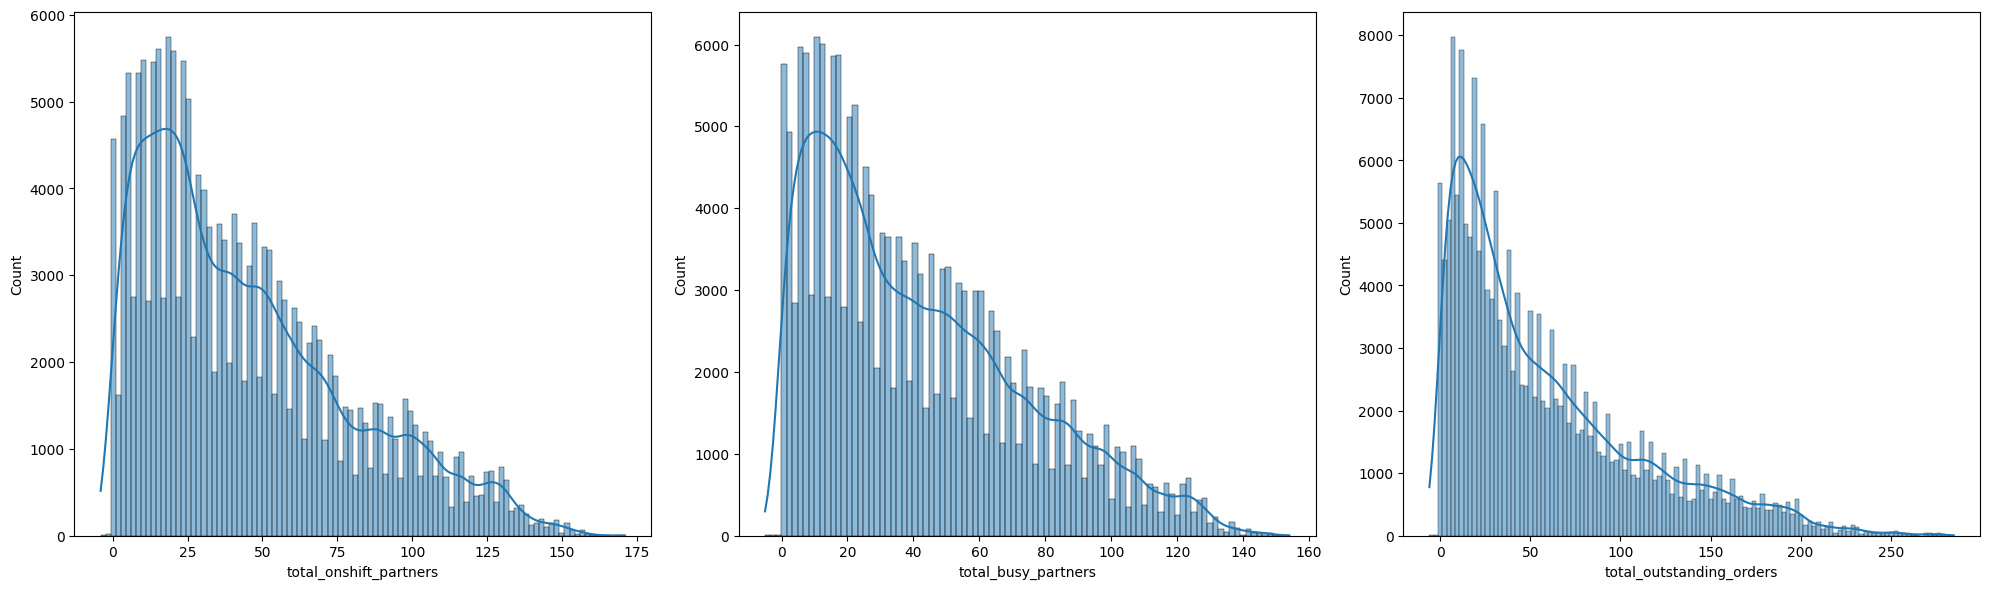

In [ ]:
num_miss_cols = ['total_onshift_partners', 'total_busy_partners', 'total_outstanding_orders']
i = 1
plt.figure(figsize = (20, 6))
for col in num_miss_cols:
  ax = plt.subplot(1,3,i)
  sns.histplot(data = (df[col]), kde = True)
  i+=1

plt.tight_layout()
plt.show()

Since the data is skewed and not normal, *median imputation* seems to be the best possible option in dealing with null values.

In [ ]:
df['total_onshift_partners'].fillna(df['total_onshift_partners'].median(), inplace = True)
df['total_busy_partners'].fillna(df['total_busy_partners'].median(), inplace = True)
df['total_outstanding_orders'].fillna(df['total_outstanding_orders'].median(), inplace = True)

**Handling Duplicates**

In [ ]:
print(f'Number of duplicate rows: {df.duplicated().sum()}')

Number of duplicate rows: 0


- **Creating the target column (time taken for delivery) from order timestamp and delivery timestamp.**
- **Getting hour and day of the week**
- **Encoding categorical column**

In [ ]:
df['created_at'] = df['created_at'].astype('datetime64[ns]')
df['actual_delivery_time'] = df['actual_delivery_time'].astype('datetime64[ns]')
df['Time_taken_for_delivery'] = (df['actual_delivery_time']-df['created_at'])/pd.Timedelta('60s')
df['hour'] = df['created_at'].dt.hour
df['day'] = df['created_at'].dt.dayofweek

Dropping the columns no longer required.

In [ ]:
df.drop(columns = ['created_at', 'actual_delivery_time'], inplace = True)

Also, **store id** doesn't seem to be helpful as well since we can't extract any meaningful data from it so, it would be wise to drop this columns as well.

In [ ]:
df.drop(columns = ['store_id'], inplace = True)

In [ ]:
num_cols = df.select_dtypes(include = 'number').columns.tolist()
cat_cols = df.select_dtypes(exclude = 'number').columns.tolist()

In [ ]:
for col in cat_cols:
  print(df[col].value_counts())

market_id
2.0    55055
4.0    47597
1.0    38037
3.0    23296
5.0    17999
6.0    14450
0.0      987
Name: count, dtype: int64
store_primary_category
american             19399
pizza                17320
mexican              17098
burger               10958
sandwich             10059
                     ...  
lebanese                 9
indonesian               2
belgian                  2
chocolate                1
alcohol-plus-food        1
Name: count, Length: 75, dtype: int64
order_protocol
1.0    54723
3.0    53197
5.0    44289
2.0    24051
4.0    19353
0.0      995
6.0      794
7.0       19
Name: count, dtype: int64


Here, I think encoding store_primary_category will be a wise decision since the rest two are integer and are relatively very less in number(7 in case of market_id and 8 in case order_protocol) so, leaving them as it is will not do any harm.

In [ ]:
print(f"Number of unique values in store_primary_category: {df['store_primary_category'].nunique()}")

Number of unique values in store_primary_category: 75


Since `store_primary_category` has **75** unique values, we cannot use One hot encoding because our dimensionality will increase dramatically thereby reducing the performance of model. So we will use **embedding layers**.

In [ ]:
df['store_primary_category'] = df['store_primary_category'].astype('category').cat.codes

In [ ]:
df.head(5)

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,Time_taken_for_delivery,hour,day
0,1.0,5,1.0,4,3441,4,557,1239,33.0,14.0,21.0,62.983333,22,4
1,2.0,48,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,67.066667,21,1
2,3.0,0,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,29.683333,20,3
3,3.0,0,1.0,6,6900,5,600,1800,1.0,1.0,2.0,51.250000,21,1
4,3.0,0,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,39.833333,2,6


All the columns have integer values which will be very good for our model.

##**Data visualization and cleaning**

- Visualization for various features
- Check for outliers
- Remove outliers
- Compare plots and results

1. Vizualization for various features

Numerical columns

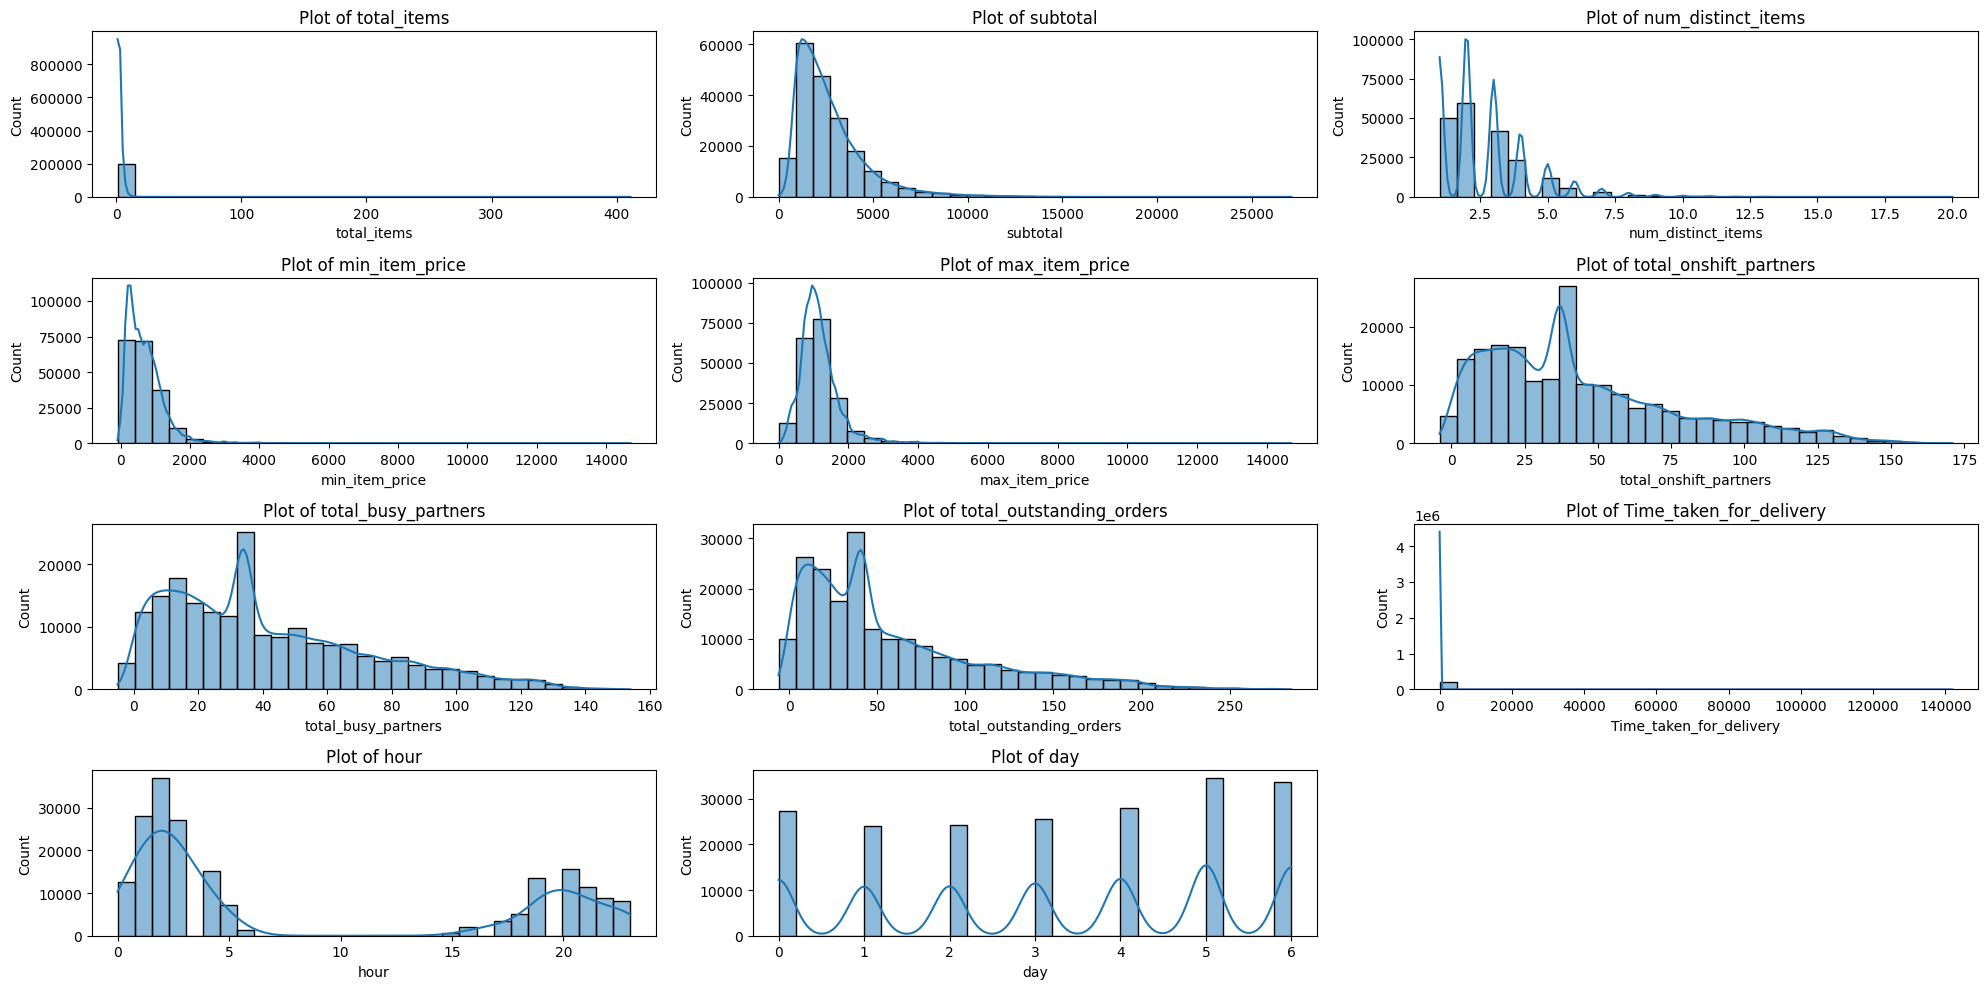

In [ ]:
plt.figure(figsize=(20, 10))
i = 1
for col in num_cols:
  ax = plt.subplot(4, 3, i)
  sns.histplot(df[col], bins = 30, kde = True)
  plt.title(f'Plot of {col}')
  i+=1

plt.tight_layout()
plt.show()

Categorical Columns

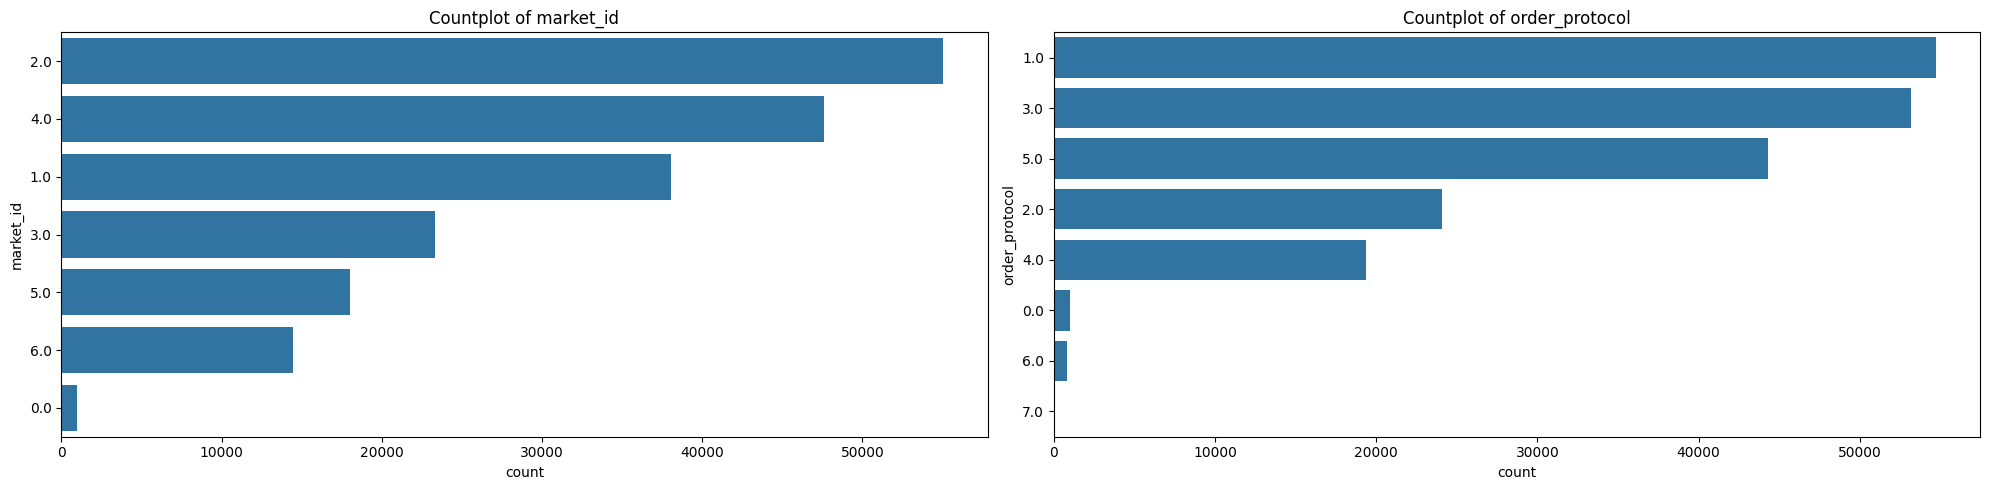

In [ ]:
plt.figure(figsize = (20, 5))
i = 1
for col in ['market_id', 'order_protocol']:
  ax = plt.subplot(1, 2, i)
  sns.countplot(df[col], order = df[col].value_counts().index)
  plt.title(f'Countplot of {col}')
  i+=1

plt.tight_layout()
plt.show()

For `store_primary_category`, we will create a plot seperately since it contains a lot of information.

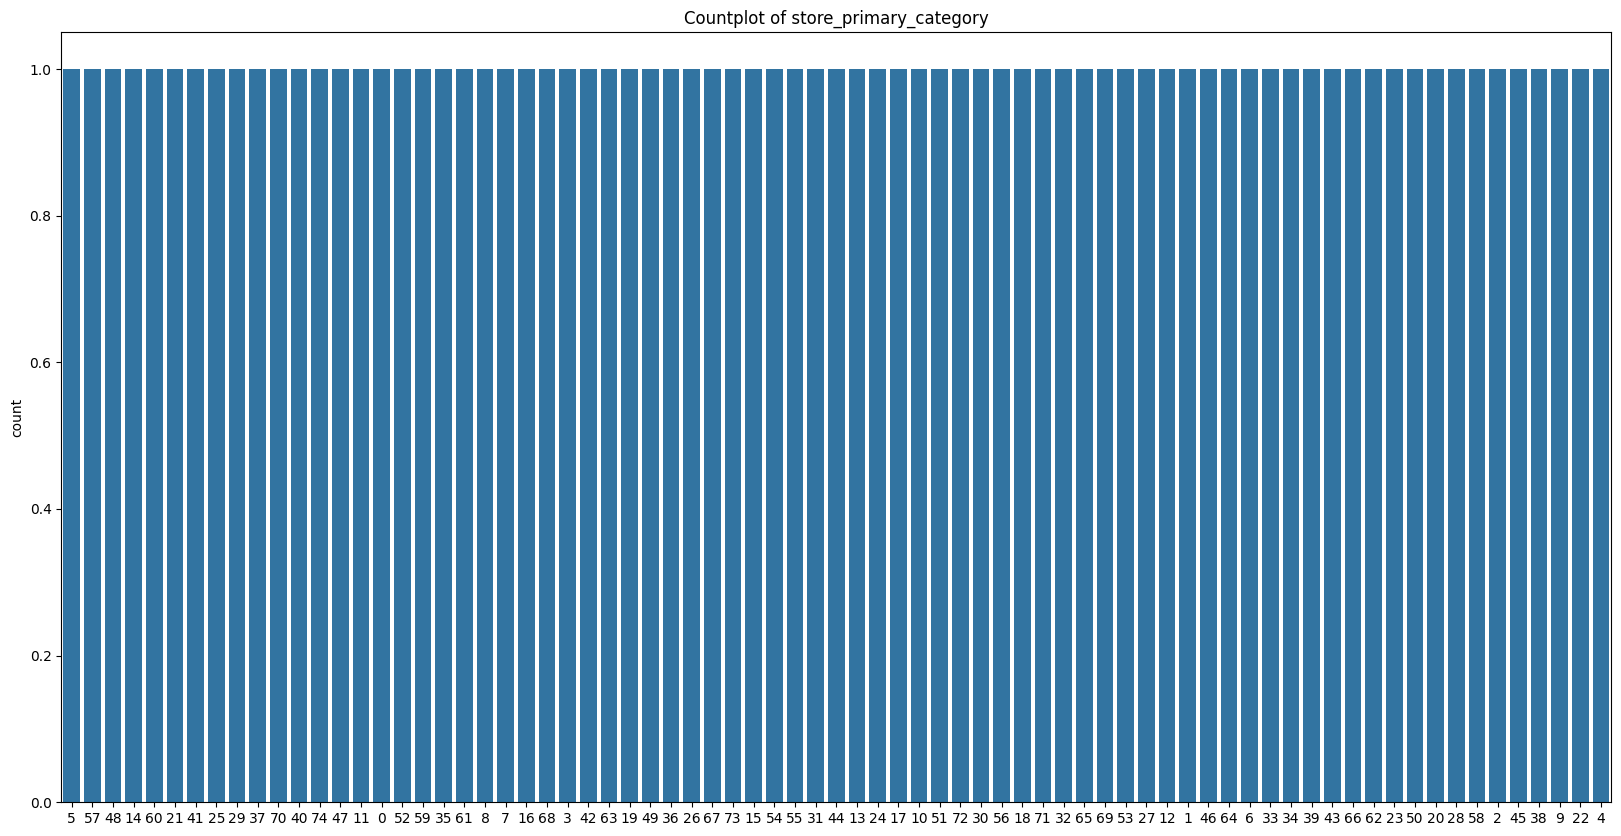

In [ ]:
plt.figure(figsize = (20, 10))
sns.countplot(df['store_primary_category'], order = df['store_primary_category'].value_counts().index)
plt.title('Countplot of store_primary_category')
plt.show()

2. Checking for outliers and removing them if possible.

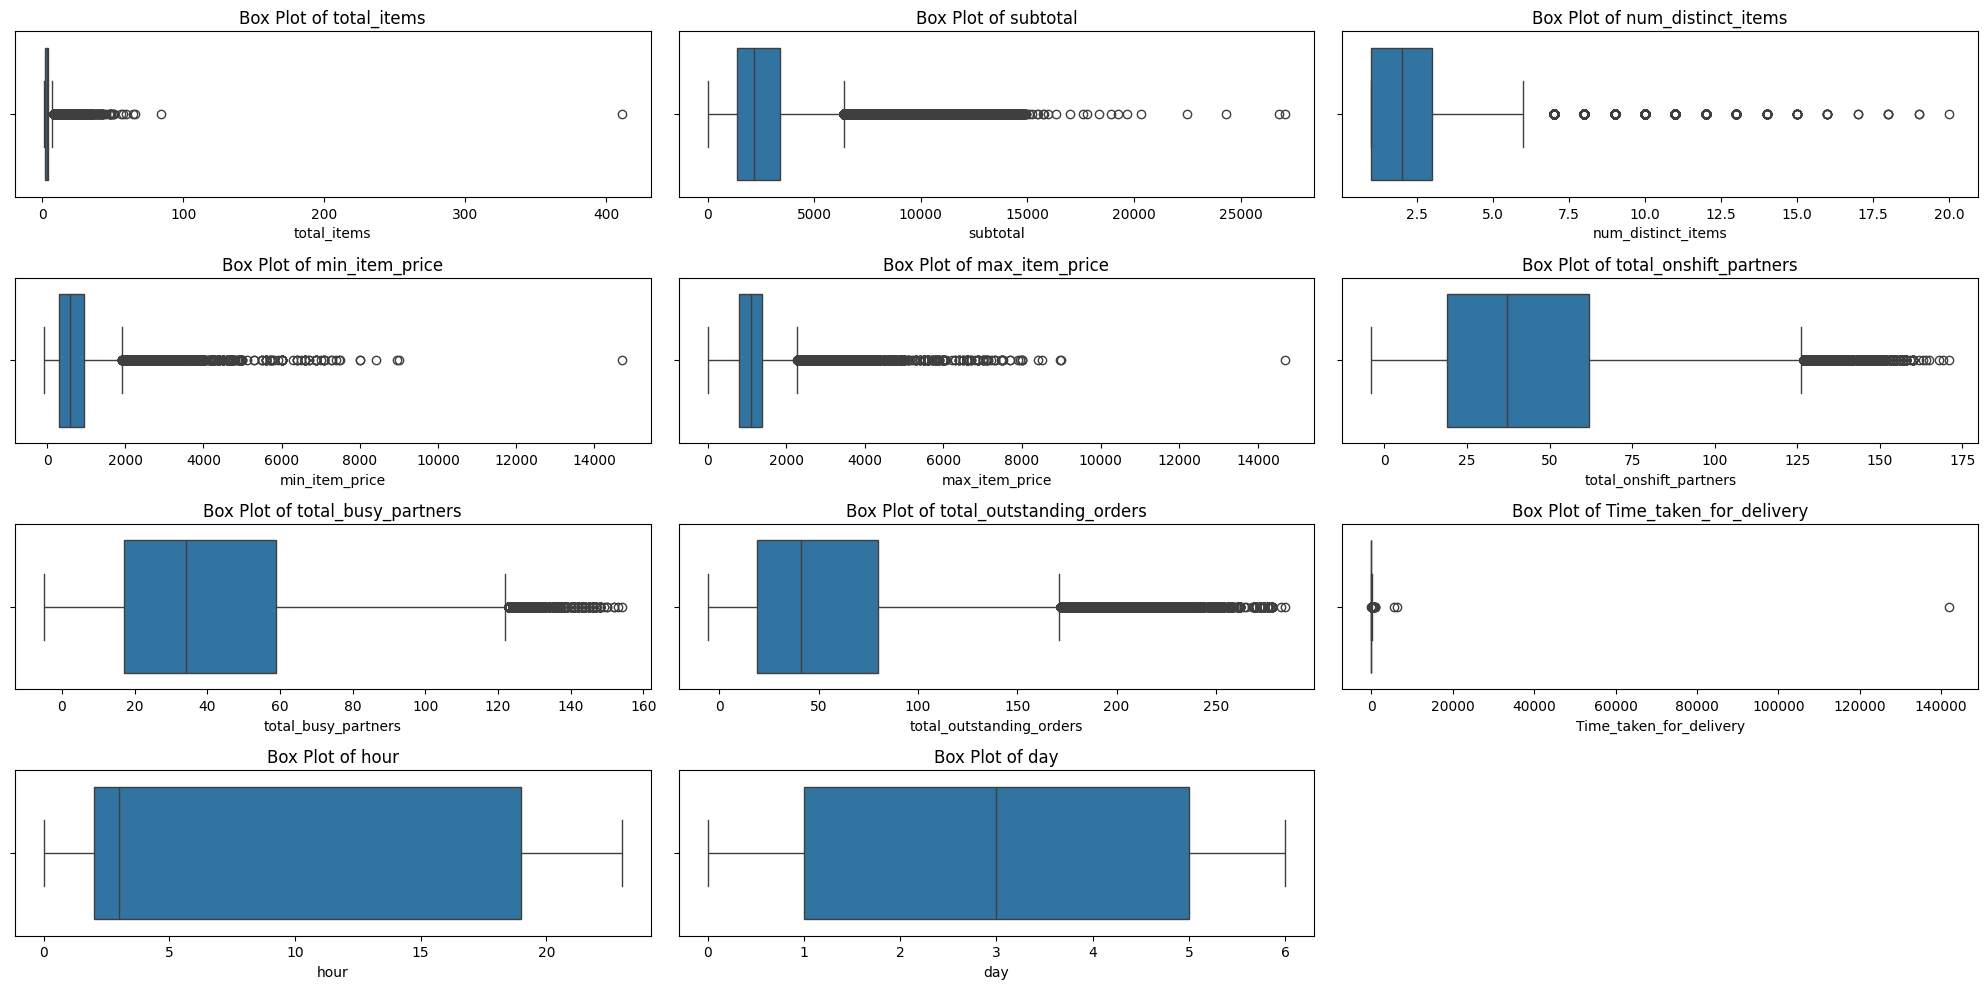

In [ ]:
plt.figure(figsize=(20, 10))
i = 1
for col in num_cols:
  ax = plt.subplot(4, 3, i)
  sns.boxplot(x = df[col])
  plt.title(f'Box Plot of {col}')
  i+=1

plt.tight_layout()
plt.show()

NNs can usually deal with these many outliers, so for now, we will not be removing them since they can't effect our model training and accuracy too much. Also, the fact that some columns have too many outliers, it could be possible that removing outliers can result in removal of important patterns or rare events which are very important for our model to learn.

However, in case of time_taken_for_delivery since we have very few outliers and they don't mean much to the data we will remove them.

In [ ]:
print((df.loc[df['Time_taken_for_delivery'] >400].shape[0] / df.shape[0]) * 100)
df.drop(index=df.loc[df['Time_taken_for_delivery'] >400].index[0],inplace=True)

0.009624102805679234


For relations between numerical columns, we will use a `correlation plot` and `heatmap`.

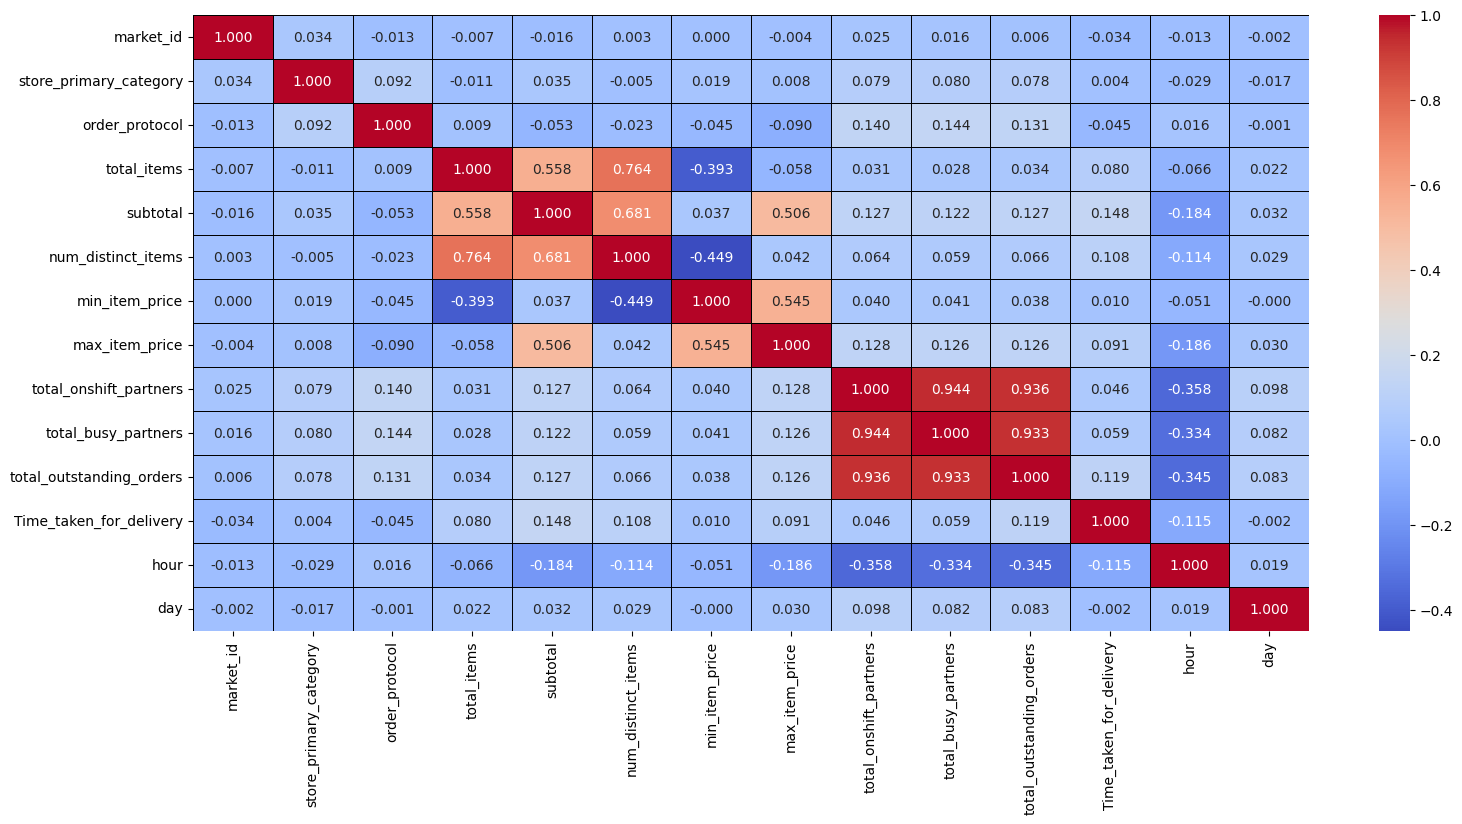

In [ ]:
plt.figure(figsize = (18, 8))
sns.heatmap(df.corr(), annot = True, fmt = '.3f', linecolor = 'black', linewidths=0.5, cmap='coolwarm')
plt.show()

## **Regression with neural networks**

- Data splitting
- Data scaling
- Defining NN architecture
- Trying different combinations and hyperparameters
- Model training

Data Splitting

In [ ]:
X = df.drop(columns = ['Time_taken_for_delivery'], axis = 1)
y = df['Time_taken_for_delivery']

We will create:

- Training Dataset: 80%
- Validation Dataset: 10%
- Testing Dataset: 10%

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state=42)

Data scaling

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

Model training

In [ ]:
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(180, activation = 'relu'))
model.add(Dense(150, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(60, activation = 'relu'))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))
model.compile(loss='mse',optimizer='adam', metrics = ['mse', R2Score()])

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 20, batch_size = 32, verbose=1)

Epoch 1/20
4936/4936 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 617.1185 - mse: 617.1185 - r2_score: -0.1241 - val_loss: 291.6005 - val_mse: 291.6005 - val_r2_score: 0.1675
Epoch 2/20
4936/4936 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 982.7690 - mse: 982.7690 - r2_score: 0.0720 - val_loss: 278.5241 - val_mse: 278.5241 - val_r2_score: 0.2049
Epoch 3/20
4936/4936 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 358.8713 - mse: 358.8713 - r2_score: 0.1597 - val_loss: 276.3200 - val_mse: 276.3200 - val_r2_score: 0.2111
Epoch 4/20
4936/4936 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - loss: 454.4319 - mse: 454.4319 - r2_score: 0.1494 - val_loss: 273.9751 - val_mse: 273.9751 - val_r2_score: 0.2178
Epoch 5/20
4936/4936 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 592.5937 - mse: 592.5937 - r2_score: 0.1228 - val_loss: 270.0383 - val_mse: 270.0383 - val_r2_score: 0.2291
Epoch 6/20
4936/4936 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - loss: 478.5268 - mse: 478.5268 - r2_score: 0.1502 - val_loss: 270.0703 - val_mse: 270.0

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 180)                 │           2,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 150)                 │          27,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          15,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 60)                  │           6,060 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 30)                  │           1,830 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 15)                  │             465 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 159,425 (622.76 KB)

 Trainable params: 53,141 (207.58 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 106,284 (415.18 KB)

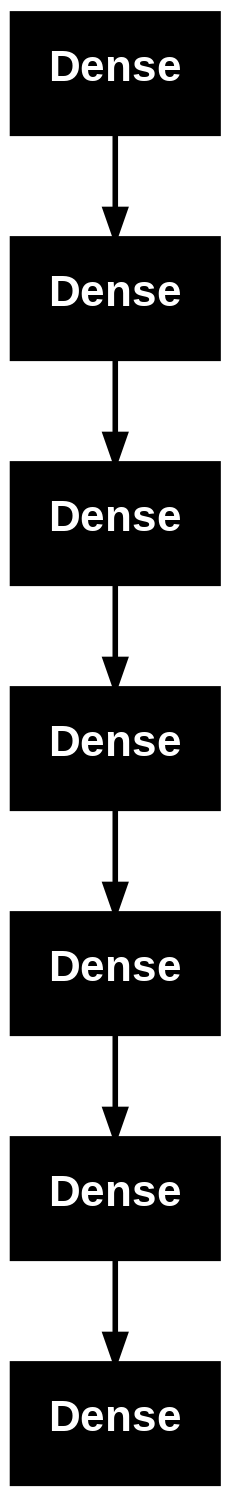

In [ ]:
model.summary()
plot_model(model)

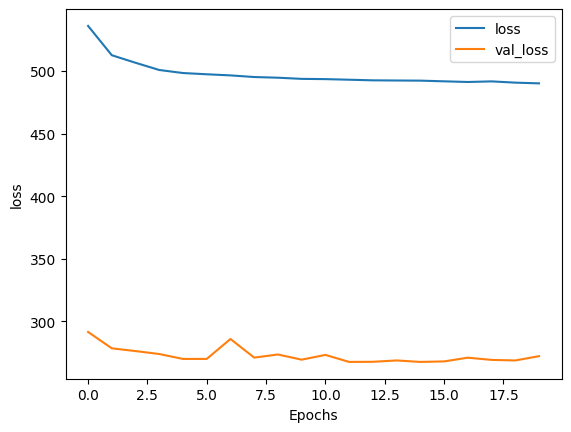

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel('loss')
plt.legend(['loss','val_loss'])
plt.show()

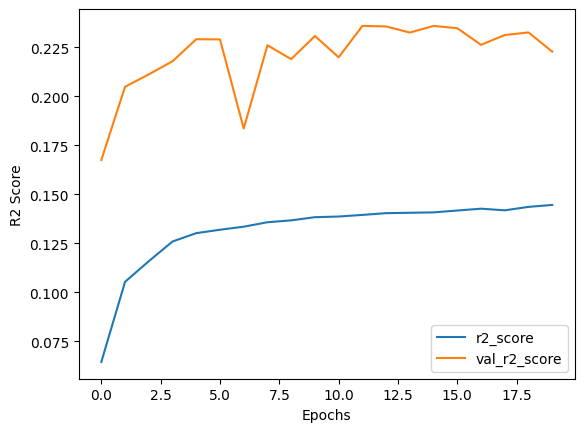

In [ ]:
plt.plot(history.history['r2_score'])
plt.plot(history.history['val_r2_score'])
plt.xlabel("Epochs")
plt.ylabel('R2 Score')
plt.legend(['r2_score','val_r2_score'])
plt.show()

In [ ]:
r2_test_score = r2_score(y_test, model.predict(X_test))
mse = mean_squared_error(y_test, model.predict(X_test))
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, model.predict(X_test))

617/617 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
617/617 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
617/617 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
print(f'The r2_score is {r2_test_score:.3f}')
print(f'The mean squared error is {mse:.2f}')
print(f'The root mean squared error is {rmse:.2f}')
print(f'The mean absolute error is {mae:.2f}')

The r2_score is 0.031
The mean squared error is 2223.59
The root mean squared error is 47.15
The mean absolute error is 12.31


##**Leading Questions**

1. Defining the problem statements and where can this and modifications of this be used?
- Delivery time estimation for the orders, we can use this case with some modification in the **Estimate Cab Arrival Time**.

2. List 3 functions the pandas datetime provides with one line explanation.
- pd.to_datetime(): Converts a date string or a numeric timestamp into a pandas Datetime object.

- .dt accessor: Allows vectorized access to attributes like year, month, day, hour, etc., from a Datetime column in a pandas DataFrame.

- pd.date_range(): Generates a sequence of Datetime objects at specified frequency, such as daily, monthly, or hourly intervals.

3. Short note on datetime, timedelta, time span (period)
- Datetime
    - A datetime represents a specific point in time, including both the date and the time of day.

- Timedelta
    - A timedelta represents the difference between two datetime objects, typically expressed in days, seconds, and microseconds.

- Time Span (Period)
    - A Period represents a time span or interval of time, such as a specific month, quarter, or year.

4. Why do we need to check for outliers in our data?
- Checking for outliers is a critical step in data preprocessing that helps ensure the reliability of statistical analysis, improves model performance, maintains data quality, and sometimes uncovers important insights.

5. Name 3 outlier removal methods?
- Z-Score Method
- IQR Method
- LOF Method

6. What classical machine learning methods can we use for this problem?
- Random Forest
- XGBoost
- Linear Regression

7. Why is scaling required for neural networks?
- Convergence Speed
- Numerical Stability
- Improving weight initialization

8. Briefly explain your choice of optimizer.
- We are using ADAM because of the following reason
  - Moment Estimation: Computes estimates of the first moment (mean) and second moment (uncentered variance) of the gradients.
  - Bias Correction: Applies bias correction to the moment estimates to counteract their initialization bias.
  - Parameter Update: Updates parameters using these corrected moment estimates, adjusted by learning rates.

9. Which activation function did you use and why?
- We are using RELU because of the following reasons:
  - Mitigating vanishing gradients
  - Sparse Activation
  - Avoid exploding gradients

10. Why does a neural network perform well on a large dataset?
- Neural networks perform well on large datasets because they provide diverse, representative, and sufficient data that helps in learning complex patterns, reducing overfitting, and improving generalization. The increased volume of data supports the training of more sophisticated models and enhances their ability to make accurate predictions.